In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

__correlación entre dos variables explicativas $x_{1}, x_{2}$__
<img src="grafo1.png" />

In [437]:
mu, sigma = 2, 0.9
x1 = np.random.normal(mu, sigma, size=100)
x2 = np.random.normal(loc=x1, scale=0.05)
y = np.random.normal(loc=x1+x2, scale=1)
X = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     214.6
Date:                Fri, 29 May 2020   Prob (F-statistic):           2.41e-36
Time:                        16:13:19   Log-Likelihood:                -128.01
No. Observations:                 100   AIC:                             262.0
Df Residuals:                      97   BIC:                             269.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2954      0.216     -1.365      0.1

<IPython.core.display.Javascript object>


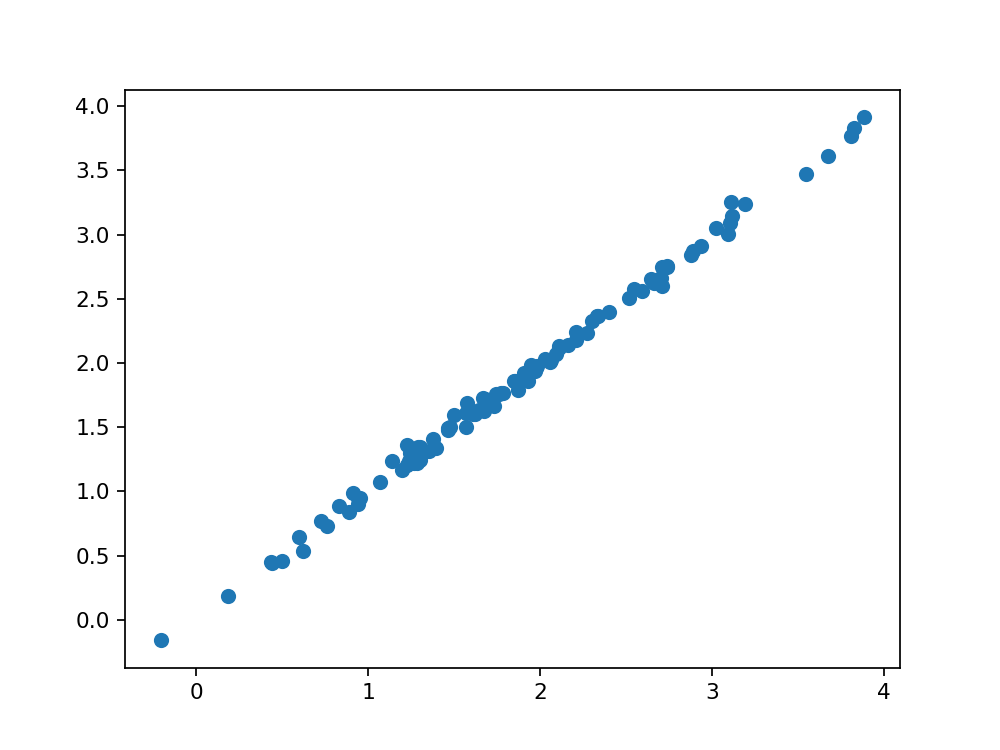

In [438]:
plt.scatter(x1, x2)

In [439]:
def colli_simulation(noise1=0.02, noise2=1):
    mu, sigma = 2, 0.9
    x1 = np.random.normal(mu, sigma, 100)
    x2 = np.random.normal(loc=x1, scale=noise1)
    y = np.random.normal(loc=x1+x2, scale=noise2)
    X = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 1)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    results = {'beta1': model.params[1], 'beta2': model.params[2], 'r_2': model.rsquared}
    return results

# Baja colinealidad $\sigma=0.2$

In [440]:
n_bads = []
r_2 = []
betas = []
N = 100
n = 0
noise1 = 0.2 
for j in range(200):

    for i in range(N):
        results = colli_simulation(noise1=noise1)
        r_2.append(results['r_2'])
        betas.append([results['beta1'], results['beta2']])
        if (results['beta1'] < 0.0) or (results['beta2'] < 0.0):
            n += 1
    n_bads.append(n/100)

<IPython.core.display.Javascript object>


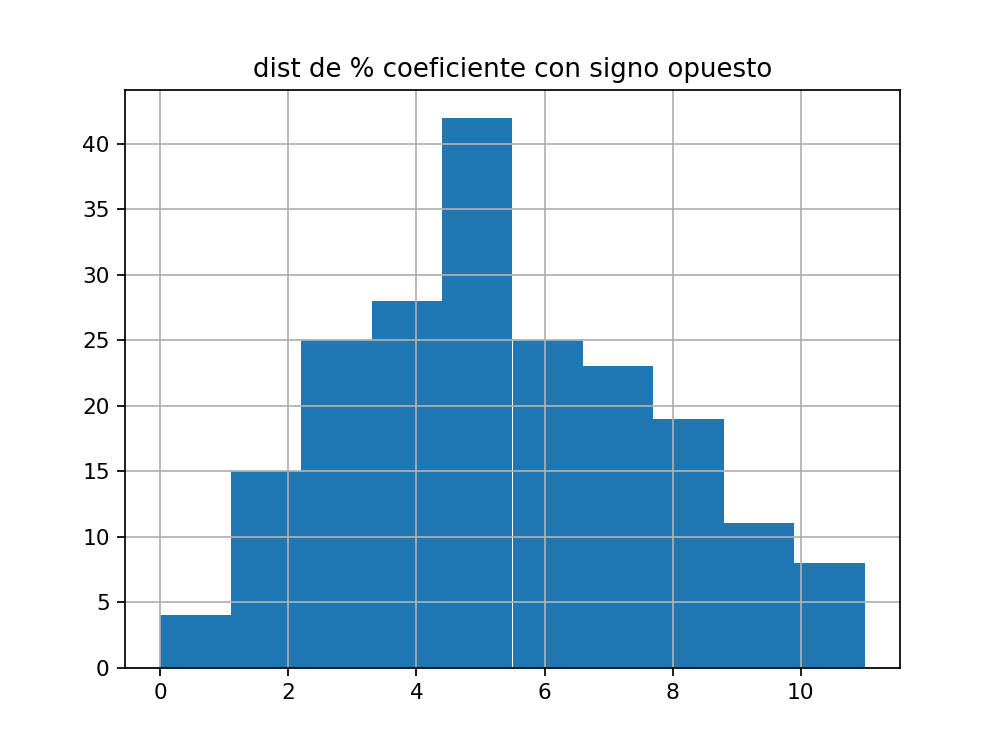

Text(0.5, 1.0, 'dist de % coeficiente con signo opuesto')

In [366]:
(100*pd.Series(n_bads)).hist(bins=10)
plt.title('dist de % coeficiente con signo opuesto')

<IPython.core.display.Javascript object>


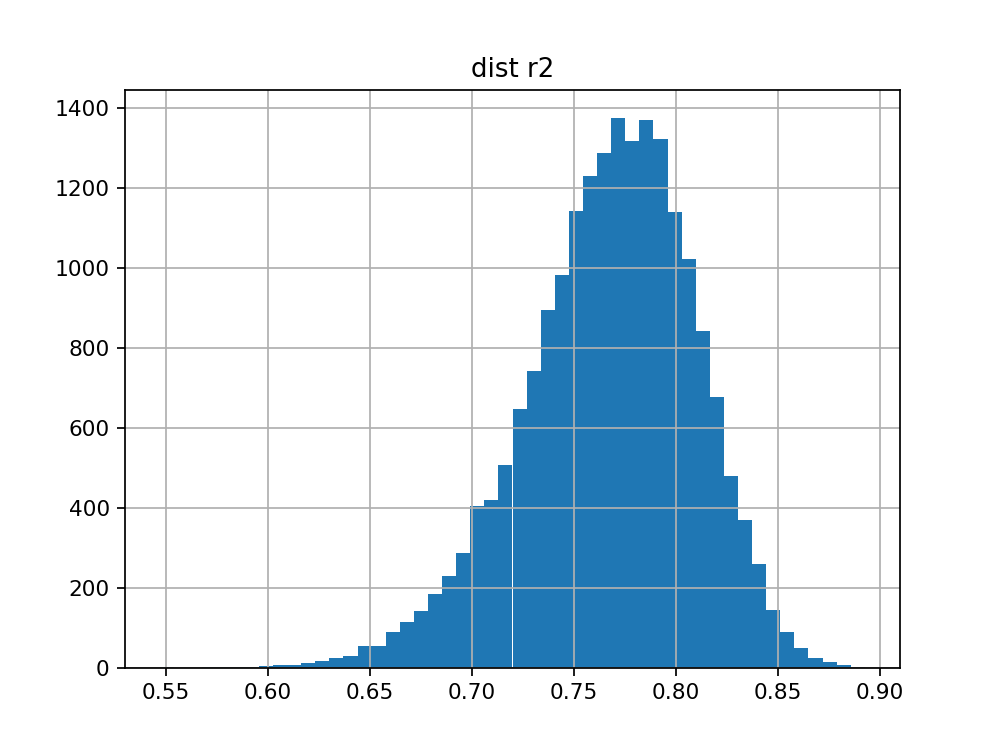

Text(0.5, 1.0, 'dist r2')

In [367]:
pd.Series(r_2).hist(bins=50)
plt.title('dist r2')

<IPython.core.display.Javascript object>


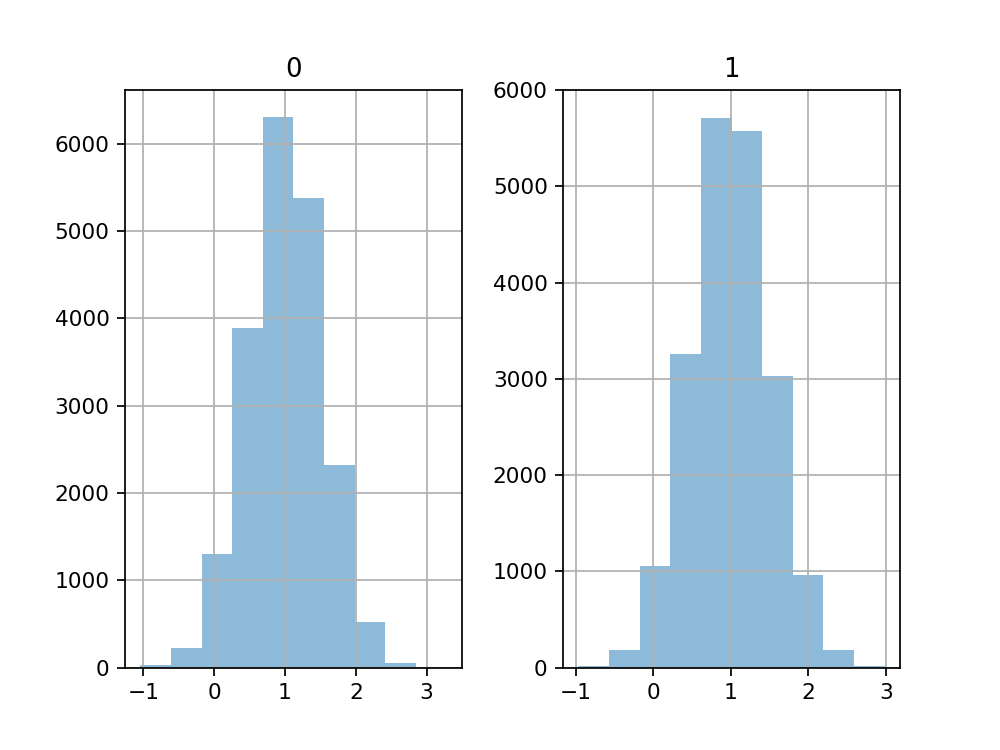

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94db343e50>,
      dtype=object)

In [372]:
pd.DataFrame(betas).hist(alpha=0.5)

# Alta colinealidad $\sigma=0.05$

In [346]:
n_bads = []
r_2 = []
betas = []
N = 100
n = 0
noise1 = 0.05
for j in range(200):
 
    for i in range(N):
        results = colli_simulation(noise1=noise1)
        r_2.append(results['r_2'])
        betas.append([results['beta1'], results['beta2']])
        if (results['beta1'] < 0.0) or (results['beta2'] < 0.0):
            n += 1
    n_bads.append(n/100)

<IPython.core.display.Javascript object>


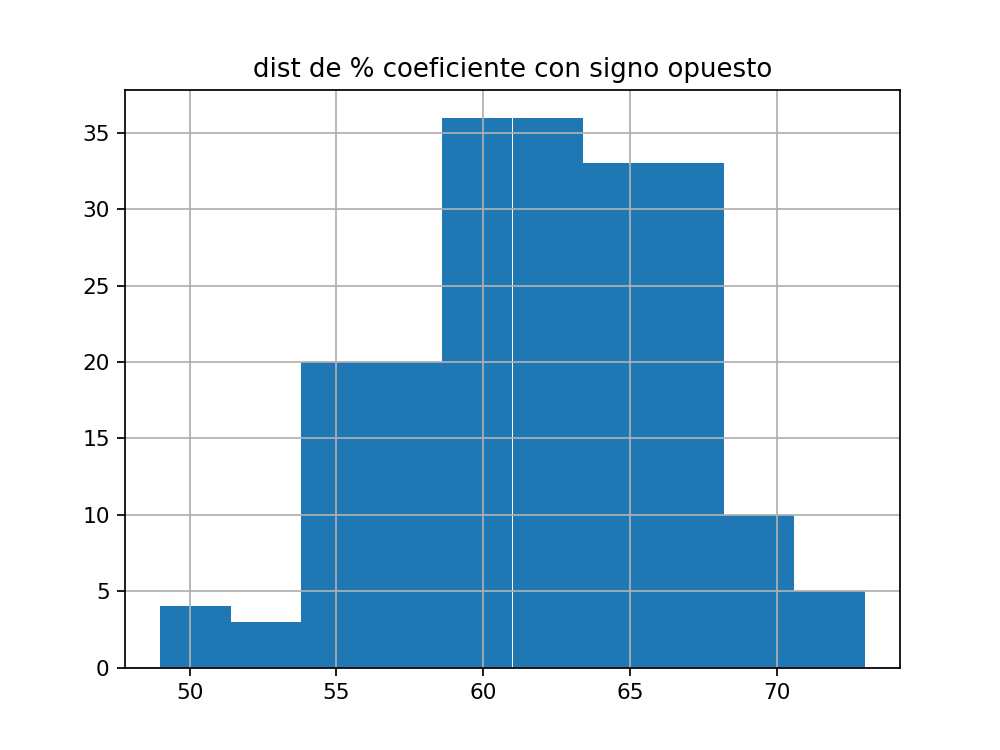

Text(0.5, 1.0, 'dist de % coeficiente con signo opuesto')

In [360]:
(100*pd.Series(n_bads)).hist(bins=10)
plt.title('dist de % coeficiente con signo opuesto')

<IPython.core.display.Javascript object>


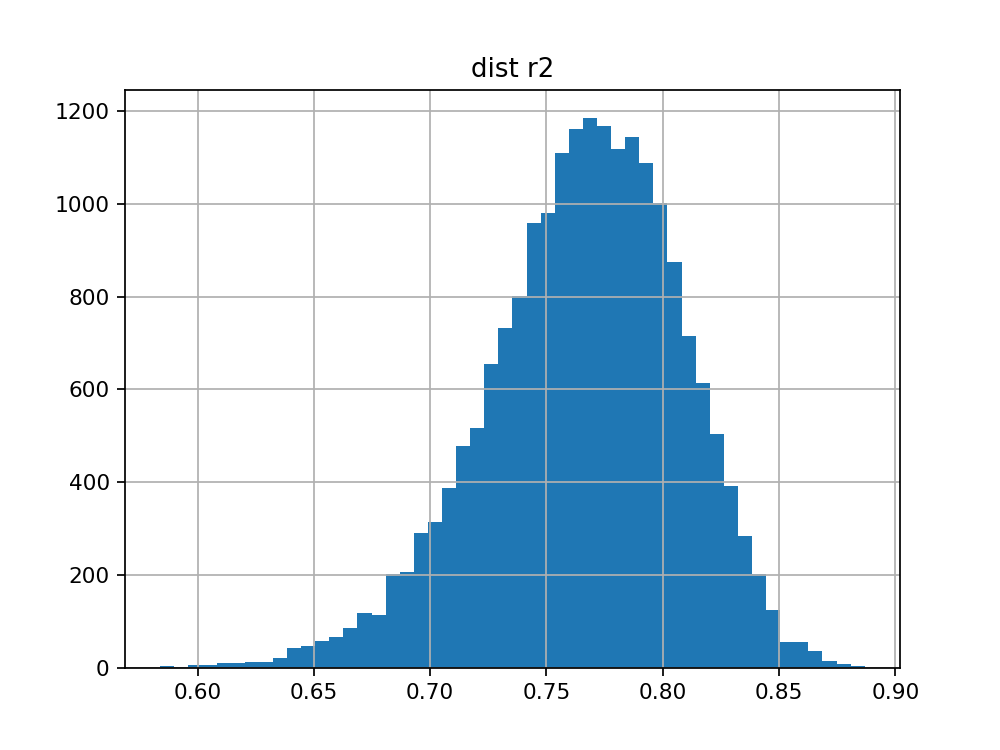

Text(0.5, 1.0, 'dist r2')

In [361]:
pd.Series(r_2).hist(bins=50)
plt.title('dist r2')

<IPython.core.display.Javascript object>


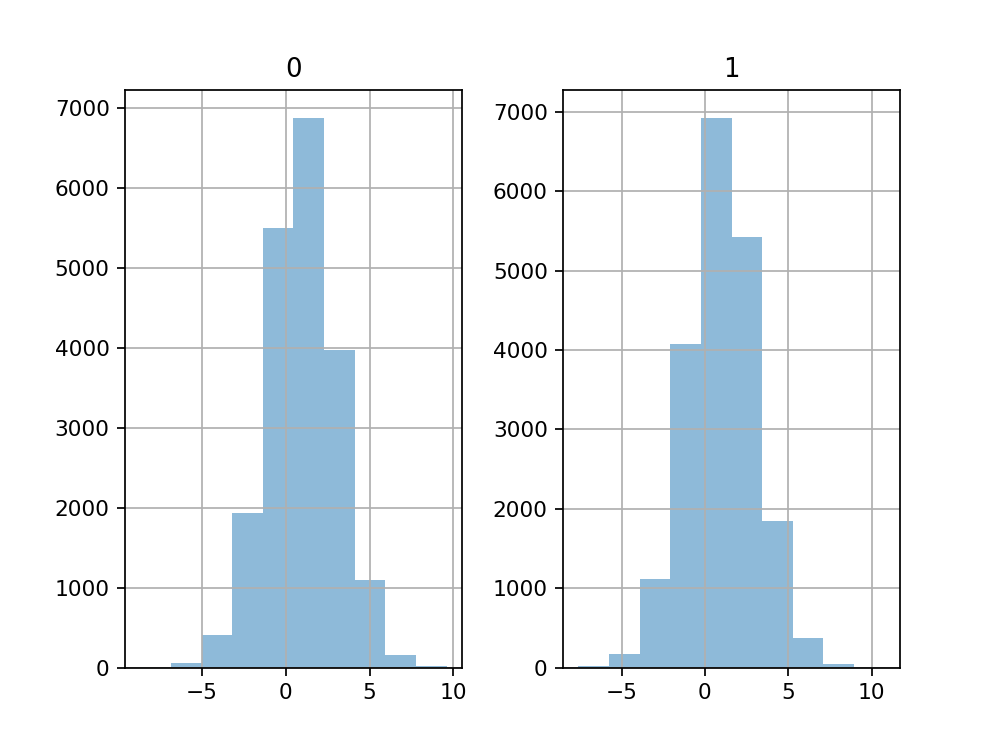

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94dfc76e90>,
      dtype=object)

In [363]:
pd.DataFrame(betas).hist(alpha=0.5)

# Bootstrap

- Take $l$ samples of size $N$ from the data.
- Do OLS for each dample and plot de parameters distribution.

In [5]:
# create dataframe to be sample
mu, sigma = 2, 0.9
x1 = np.random.normal(mu, sigma, size=100)
x2 = np.random.normal(loc=x1, scale=0.05)
y = np.random.normal(loc=x1+x2, scale=1)
X = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     135.6
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           7.95e-29
Time:                        20:23:01   Log-Likelihood:                -143.61
No. Observations:                 100   AIC:                             293.2
Df Residuals:                      97   BIC:                             301.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3809      0.307     -1.241      0.2

In [62]:
data = pd.read_pickle('data.pkl')
params = []
for i in range(100):
    aux = data.sample(95)
    model = sm.OLS(aux.values[:, -1], aux.values[:, :-1]).fit()
    params.append(model.params)

<IPython.core.display.Javascript object>


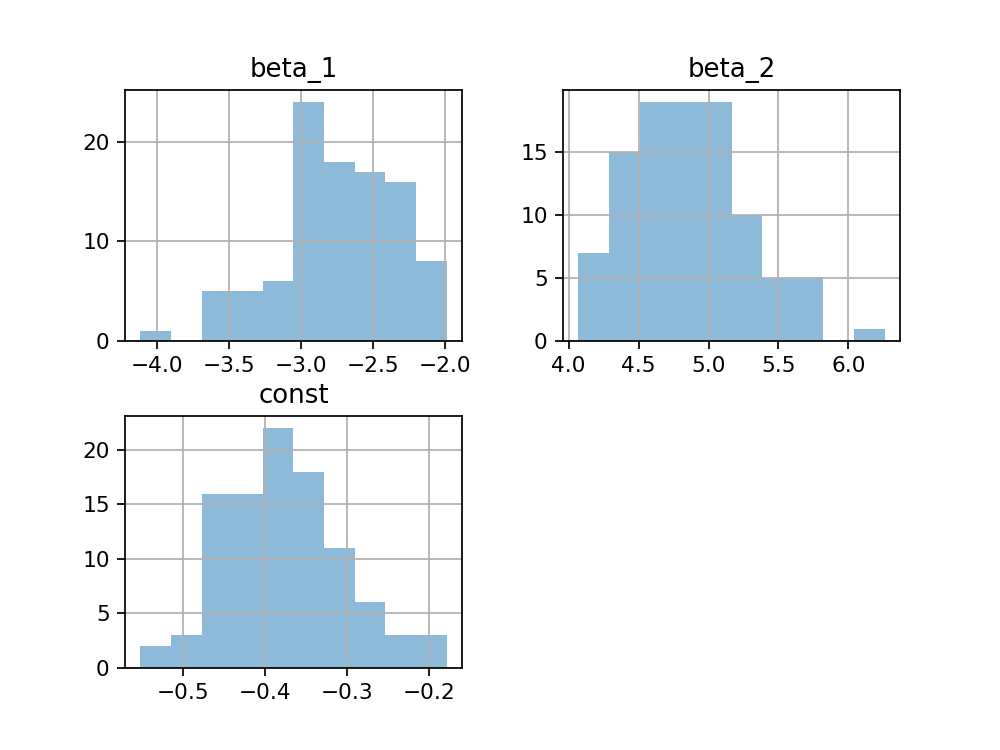

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2701cf5750>,
      dtype=object)

In [64]:
pd.DataFrame(params, columns=['const', 'beta_1', 'beta_2']).hist(alpha=0.5)

In [48]:
params = []
for i in range(100):
    idx = np.random.choice(100, 100)
    model = sm.OLS(y[idx], X[idx, :]).fit()
    print_model = model.summary()
    params.append(model.params)

<IPython.core.display.Javascript object>


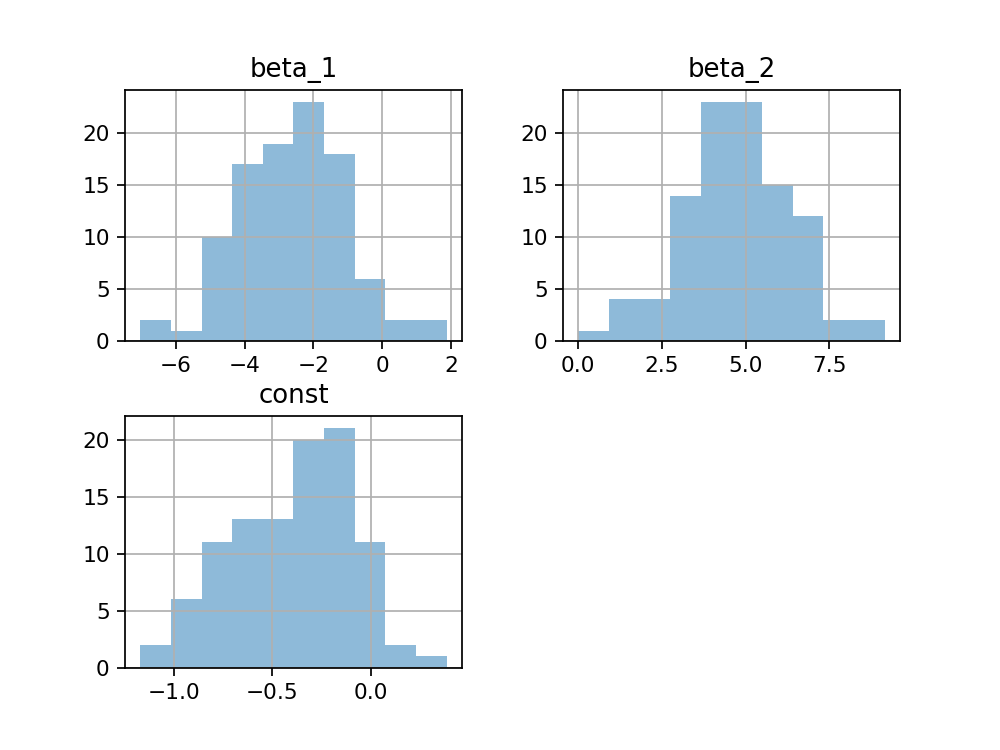

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f270344c910>,
      dtype=object)

In [49]:
pd.DataFrame(params, columns=['const', 'beta_1', 'beta_2']).hist(alpha=0.5)

# Teoría

<img src="matrix1.png" />
<img src="matrix2.png" />
<img src="var.png" />

# Ridge

## $$RSS + \lambda\sum_{i=1}^{p}\alpha_{i}^{2}$$

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [114]:
def ridge_search(X, y):
    alpha_space = np.logspace(-2, 1)
    ridge = Ridge()
    parameters = {'alpha': alpha_space}
    ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
    _ = ridge_regressor.fit(X, y)
    print(ridge_regressor.best_params_)
    print(ridge_regressor.best_score_)
    print(ridge_regressor.best_estimator_.coef_)
    
def ridge_curves(X, y):
    alpha_space = np.logspace(-2, 1)
    curve = []
    coeff = []
    for alpha in alpha_space:
        ridge = Ridge(alpha=alpha)
        cv_results = cross_validate(ridge, X, y, cv=5, return_estimator=True)
        curve.append([cv_results['test_score'].mean(), cv_results['test_score'].std()])
        aux_coeff = []
        for estimator in cv_results['estimator']:
            aux_coeff.append(estimator.coef_)
        coeff.append(list(np.array(aux_coeff).mean(0))+list(np.array(aux_coeff).std(0)))
    df_coeff = pd.DataFrame(coeff, columns=['b1_mean', 'b2_mean', 'b1_std', 'b2_std'],
                            index=alpha_space)
    df_r2 = pd.DataFrame(curve, columns=['r2_mean', 'r2_std'], index=alpha_space)
    return df_coeff, df_r2

def lasso_search(X, y):
    alpha_space = np.logspace(-2, 1)
    lasso = Lasso()
    parameters = {'alpha': alpha_space}
    lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
    _ = lasso_regressor.fit(X, y)
    print(lasso_regressor.best_params_)
    print(lasso_regressor.best_score_)
    print(lasso_regressor.best_estimator_.coef_)
    
def lasso_curves(X, y):
    alpha_space = np.logspace(-2, 1)
    curve = []
    coeff = []
    for alpha in alpha_space:
        lasso = Lasso(alpha=alpha)
        cv_results = cross_validate(lasso, X, y, cv=5, return_estimator=True)
        curve.append([cv_results['test_score'].mean(), cv_results['test_score'].std()])
        aux_coeff = []
        for estimator in cv_results['estimator']:
            aux_coeff.append(estimator.coef_)
        coeff.append(list(np.array(aux_coeff).mean(0))+list(np.array(aux_coeff).std(0)))
    df_coeff = pd.DataFrame(coeff, columns=['b1_mean', 'b2_mean', 'b1_std', 'b2_std'],
                            index=alpha_space)
    df_r2 = pd.DataFrame(curve, columns=['r2_mean', 'r2_std'], index=alpha_space)
    return df_coeff, df_r2

def elasticnet_search(X, y):
    alpha_space = np.logspace(-2, 1)
    elasticnet = ElasticNet()
    parameters = {'alpha': alpha_space}
    elasticnet_regressor = GridSearchCV(elasticnet, parameters, scoring='r2', cv=5)
    _ = elasticnet_regressor.fit(X, y)
    print(elasticnet_regressor.best_params_)
    print(elasticnet_regressor.best_score_)
    print(elasticnet_regressor.best_estimator_.coef_)
    
def elasticnet_curves(X, y):
    alpha_space = np.logspace(-2, 1)
    curve = []
    coeff = []
    for alpha in alpha_space:
        elasticnet = ElasticNet(alpha=alpha)
        cv_results = cross_validate(elasticnet, X, y, cv=5, return_estimator=True)
        curve.append([cv_results['test_score'].mean(), cv_results['test_score'].std()])
        aux_coeff = []
        for estimator in cv_results['estimator']:
            aux_coeff.append(estimator.coef_)
        coeff.append(list(np.array(aux_coeff).mean(0))+list(np.array(aux_coeff).std(0)))
    df_coeff = pd.DataFrame(coeff, columns=['b1_mean', 'b2_mean', 'b1_std', 'b2_std'],
                            index=alpha_space)
    df_r2 = pd.DataFrame(curve, columns=['r2_mean', 'r2_std'], index=alpha_space)
    return df_coeff, df_r2

In [83]:
ridge_search(data.values[:, 1:-1], data.values[:, -1])

{'alpha': 0.07196856730011521}
0.6840985277096919
[-1.3953835   3.50655214]


In [84]:
df_coeff, df_r2 = ridge_curves(data.values[:, 1:-1], data.values[:, -1])

<IPython.core.display.Javascript object>


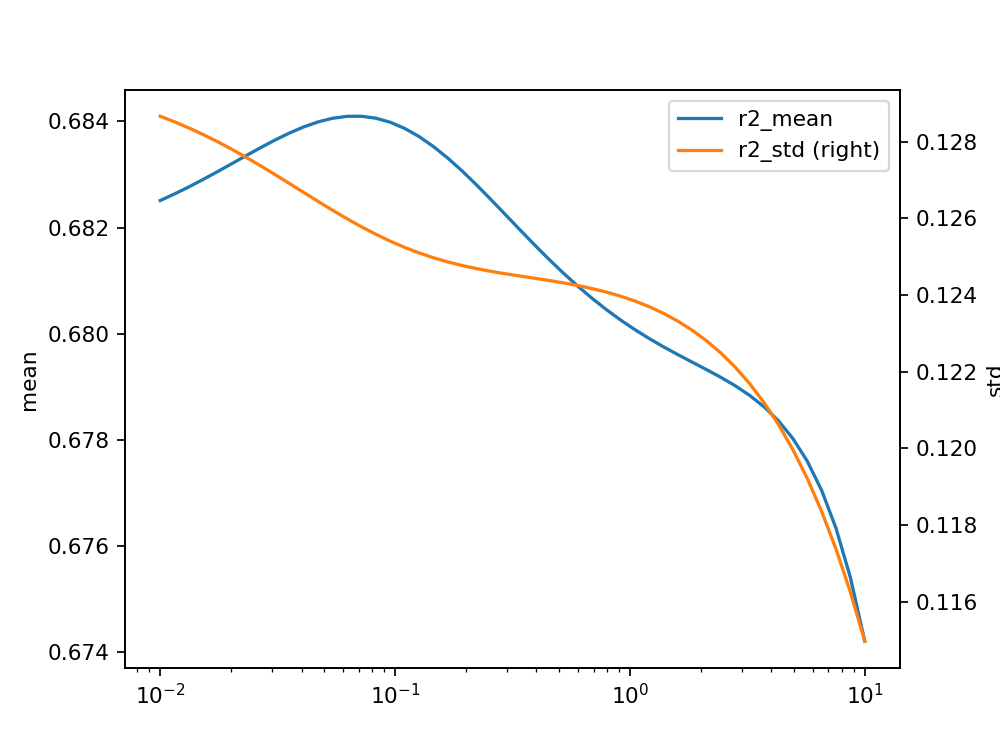

Text(0, 0.5, 'std')

In [86]:
ax = df_r2.plot(secondary_y=['r2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

<IPython.core.display.Javascript object>


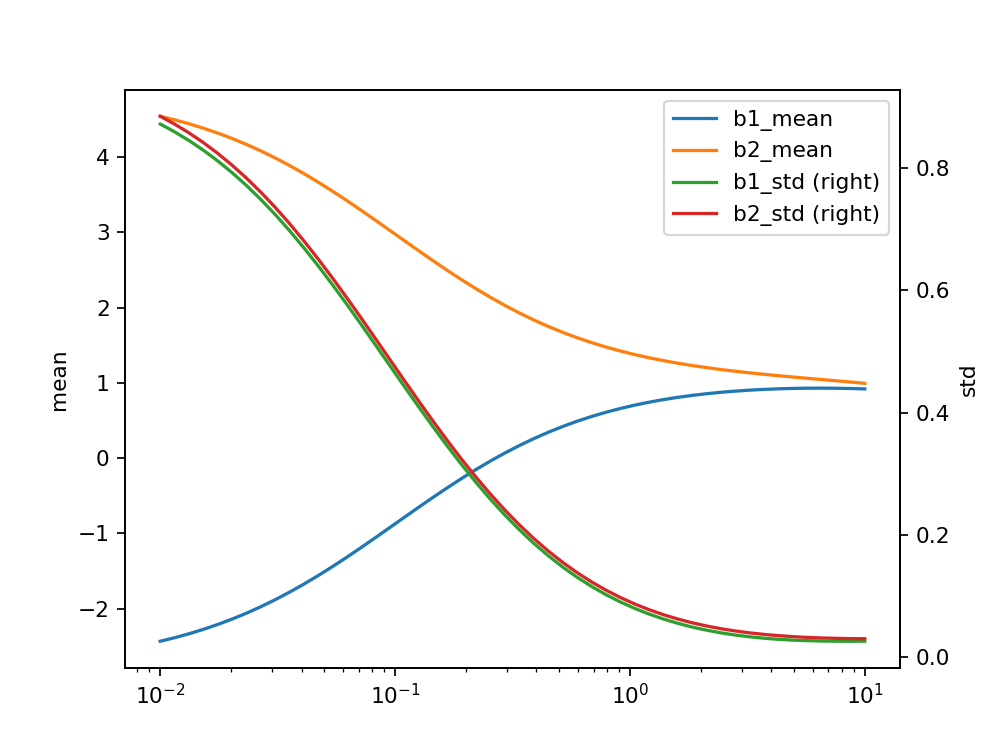

Text(0, 0.5, 'std')

In [85]:
ax = df_coeff.plot(secondary_y=['b1_std', 'b2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

In [95]:
mu, sigma = 2, 0.9
x1 = np.random.normal(mu, sigma, size=100)
x2 = np.random.normal(loc=x1, scale=0.05)
y = np.random.normal(loc=x1+x2, scale=1)
X = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], 1)
reg = LinearRegression().fit(X, y)
print(stats.pearsonr(x1, x2))
print(reg.coef_)

(0.9983482099199793, 2.0825607255304937e-123)
[ 2.25243244 -0.29531978]


In [100]:
params = []
for i in range(100):
    idx = np.random.choice(100, 100)
    reg = LinearRegression().fit(X[idx, :], y[idx])
    params.append(reg.coef_)

<IPython.core.display.Javascript object>


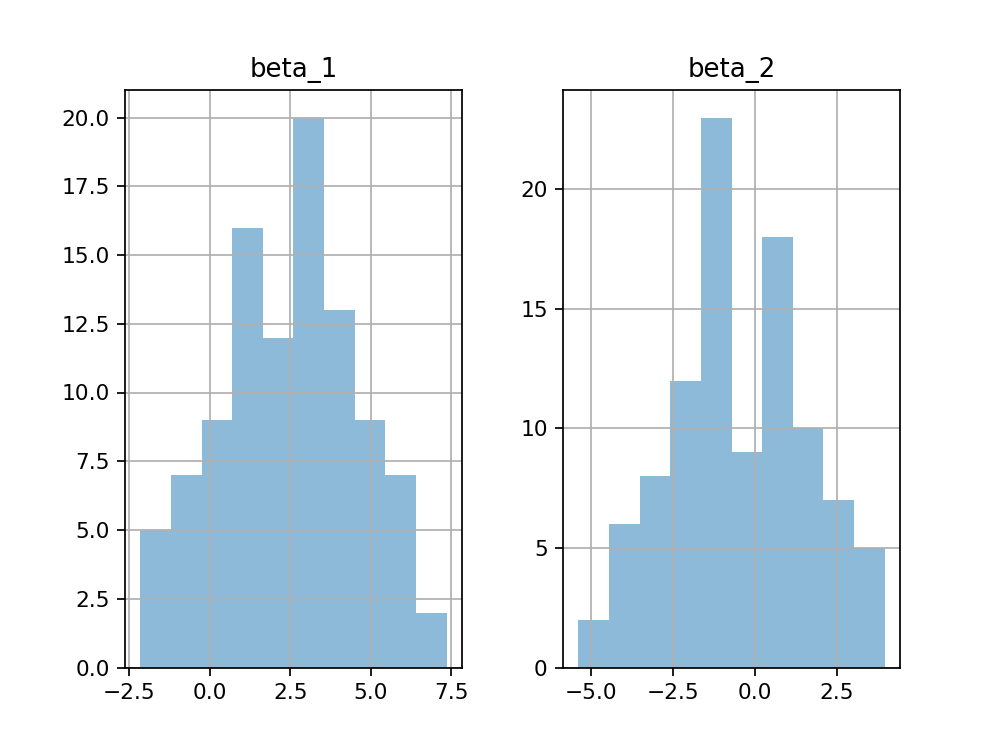

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f331a3d0>,
      dtype=object)

In [101]:
pd.DataFrame(params, columns=['beta_1', 'beta_2']).hist(alpha=0.5)

In [96]:
alpha_space = np.logspace(-2, 1)
ridge = Ridge()
parameters = {'alpha': alpha_space}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
_ = ridge_regressor.fit(X, y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print(ridge_regressor.best_estimator_.coef_)

{'alpha': 4.941713361323833}
0.6782303840139111
[0.97241533 0.91580449]


In [97]:
curve = []
coeff = []
for alpha in alpha_space:
    ridge = Ridge(alpha=alpha)
    cv_results = cross_validate(ridge, X, y, cv=5, return_estimator=True)
    curve.append([cv_results['test_score'].mean(), cv_results['test_score'].std()])
    aux_coeff = []
    for estimator in cv_results['estimator']:
        aux_coeff.append(estimator.coef_)
    coeff.append(list(np.array(aux_coeff).mean(0))+list(np.array(aux_coeff).std(0)))
df_coeff = pd.DataFrame(coeff, columns=['b1_mean', 'b2_mean', 'b1_std', 'b2_std'],
                        index=alpha_space)
df_r2 = pd.DataFrame(curve, columns=['r2_mean', 'r2_std'], index=alpha_space)

<IPython.core.display.Javascript object>


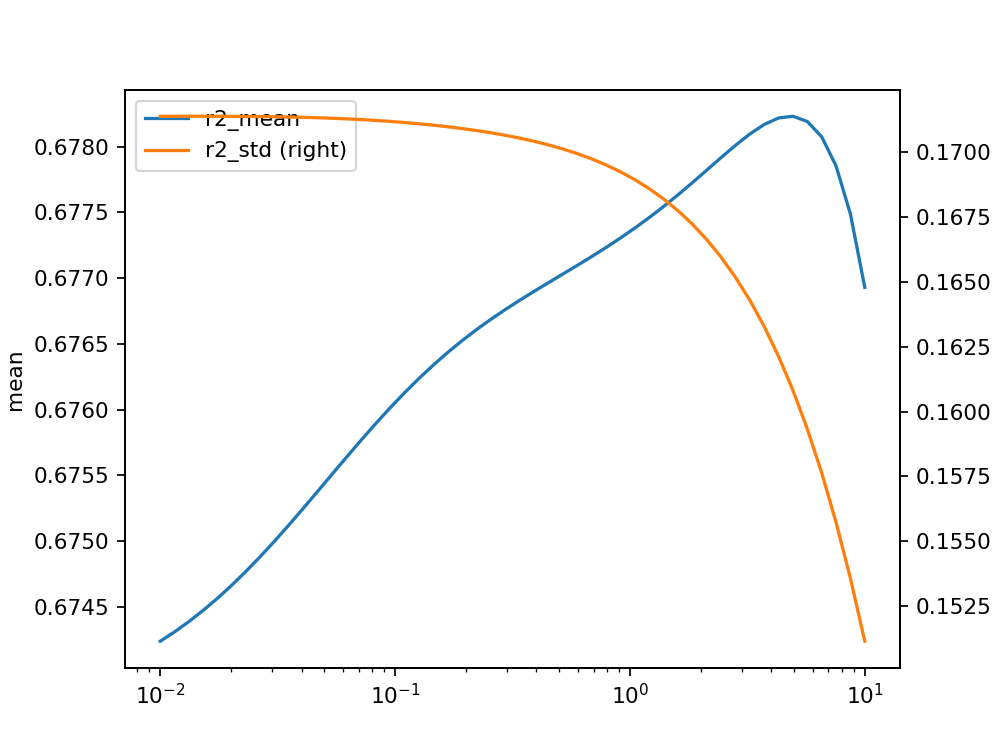

Text(0, 0.5, 'std')

In [98]:
ax = df_r2.plot(secondary_y=['r2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

<IPython.core.display.Javascript object>


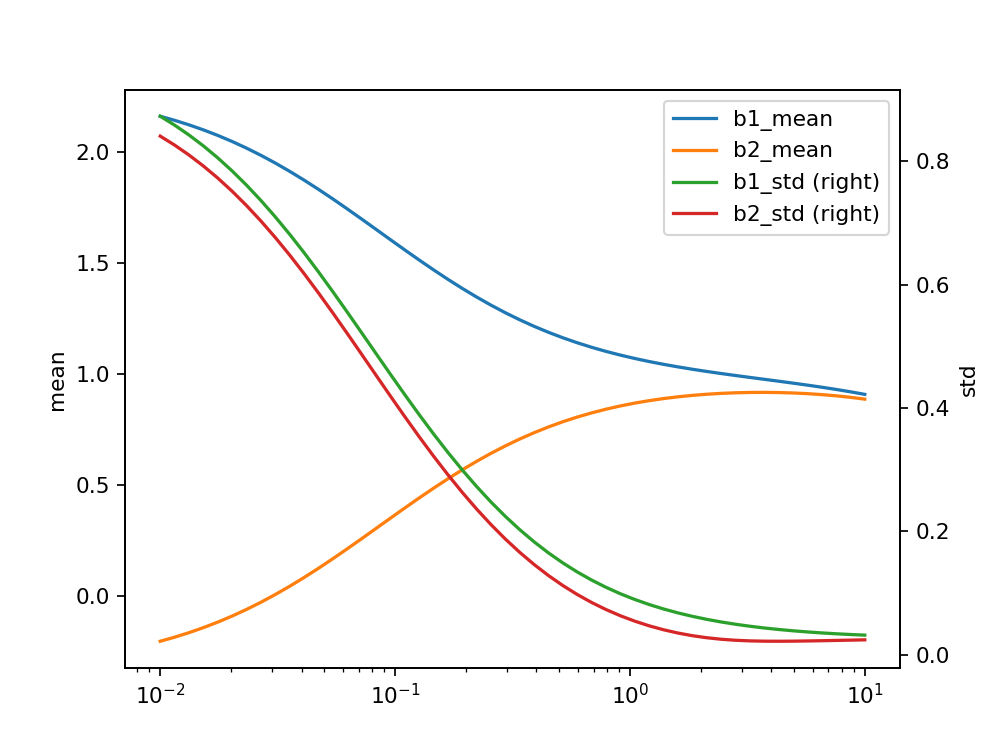

Text(0, 0.5, 'std')

In [99]:
ax = df_coeff.plot(secondary_y=['b1_std', 'b2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

# Lasso Regression

In [108]:
data = pd.read_pickle('data.pkl')
lasso_search(data.values[:, :-1], data.values[:, -1])
df_coeff, df_r2 = lasso_curves(data.values[:, :-1], data.values[:, -1])

{'alpha': 0.04714866363457394}
0.677397574291996
[1.8894931 0.       ]


<IPython.core.display.Javascript object>


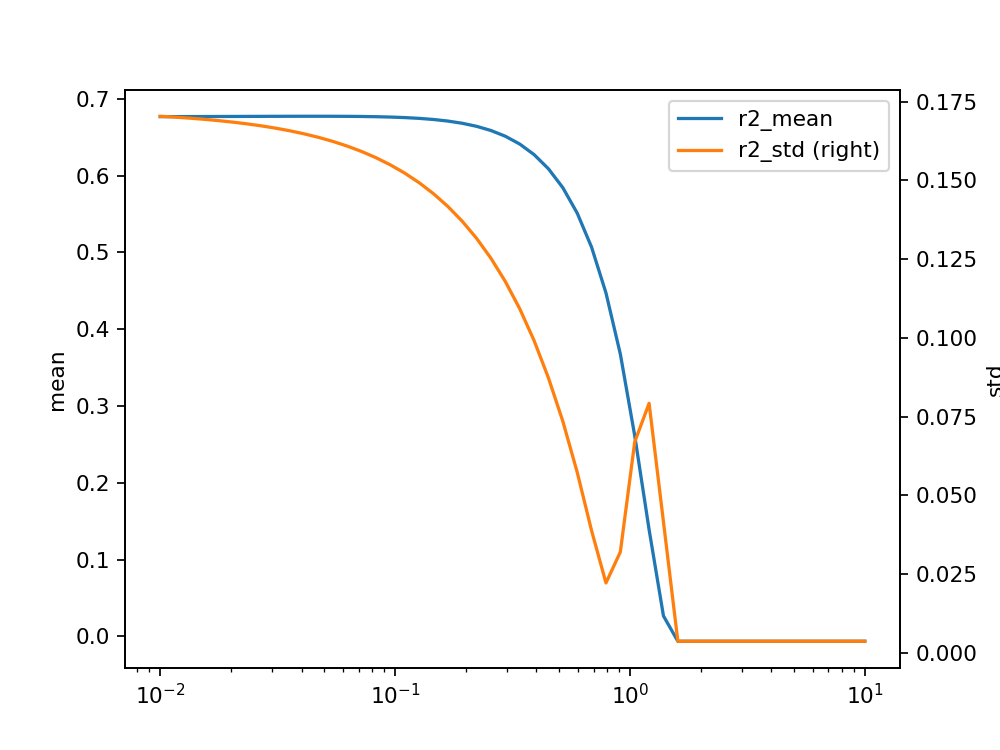

Text(0, 0.5, 'std')

In [111]:
ax = df_r2.plot(secondary_y=['r2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

<IPython.core.display.Javascript object>


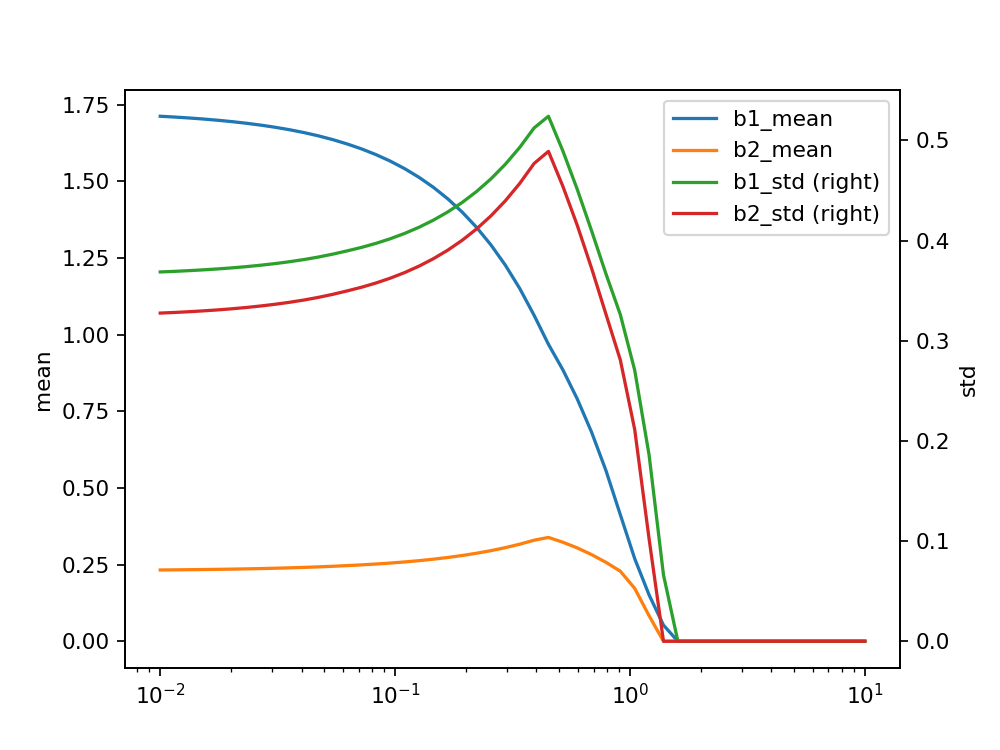

Text(0, 0.5, 'std')

In [109]:
ax = df_coeff.plot(secondary_y=['b1_std', 'b2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

# ElasticNet

In [115]:
elasticnet_search(data.values[:, :-1], data.values[:, -1])
df_coeff, df_r2 = elasticnet_curves(data.values[:, :-1], data.values[:, -1])

{'alpha': 0.054286754393238594}
0.6780500954663248
[0.99140221 0.88830372]


<IPython.core.display.Javascript object>


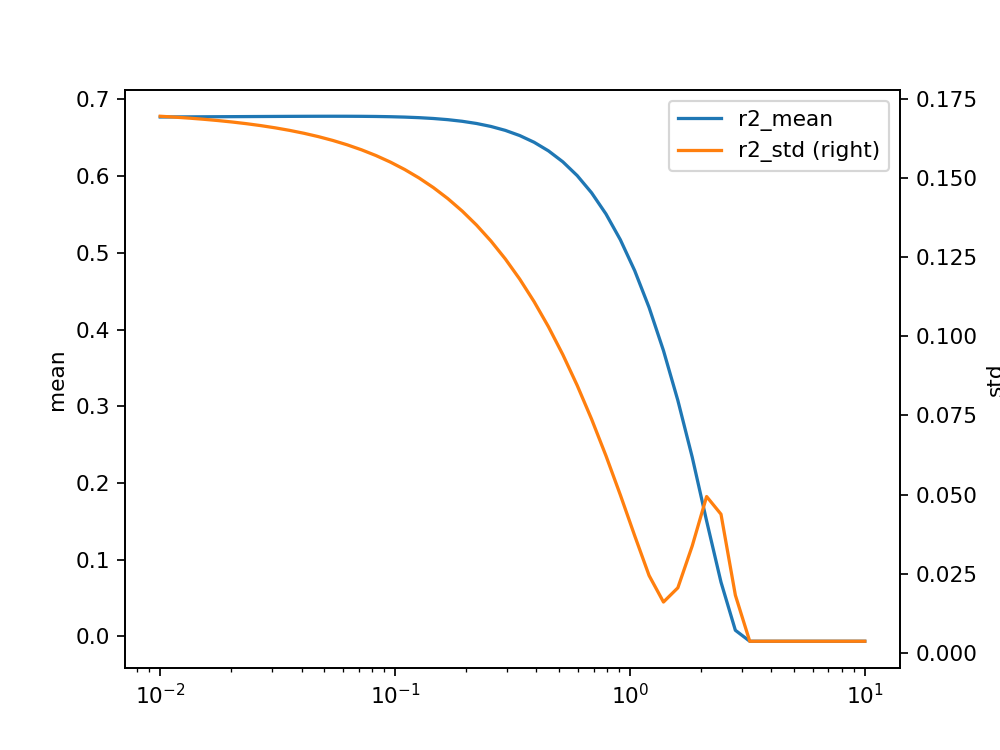

Text(0, 0.5, 'std')

In [116]:
ax = df_r2.plot(secondary_y=['r2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

<IPython.core.display.Javascript object>


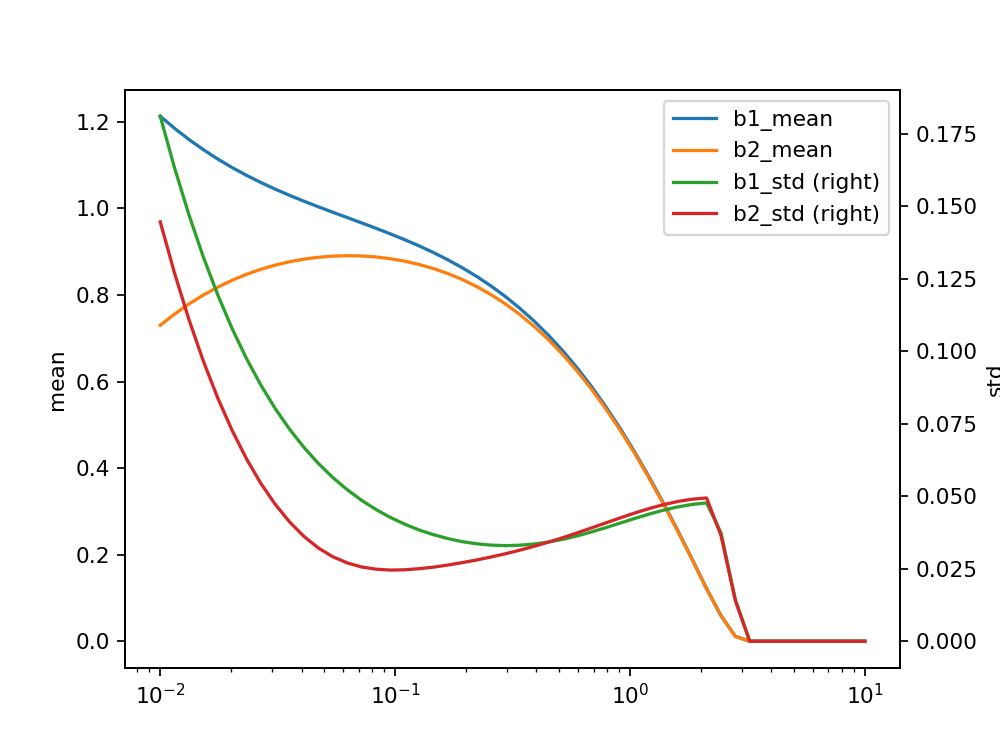

Text(0, 0.5, 'std')

In [117]:
ax = df_coeff.plot(secondary_y=['b1_std', 'b2_std'], logx=True)
ax.set_ylabel('mean')
ax.right_ax.set_ylabel('std')

## Ridge Effect

<img src="bayased.png" />
<img src="lassoridge.png" />


# Redes Bayesianas

## No-simultaneidad
<img src="grafo2.png" />